# ================ Aggregation & GroupBy ================

In [1]:
import pandas as pd
import numpy as np

## ----------- GroupBy -----------
> to split data into groups, apply some operation, and then combine the results

> Split Apply Combine

> DataFrame.groupby(by=None, axis=<no_default>, level=None, as_index=True, sort=True, group_keys=True, observed=<no_default>, dropna=True)

In [12]:
data = {
    "Department": ["Sales", "Sales", "HR", "HR", "IT", "IT", "Sales"],
    "Employee": ["A", "B", "C", "D", "E", "F", "G"],
    "Gender": [1, 0, 0, 0, 1, 1, 1],
    "Salary": [50000, 55000, 40000, 42000, 60000, 65000, 52000],
    "Bonus": [2000, 2500, 1800, 2000, 3000, 3200, 2100],
    "Experience": [2, 3, 4, 5, 3, 6, 1]
}

df = pd.DataFrame(data)
df


,Department,Employee,Gender,Salary,Bonus,Experience
0,Sales,A,1,50000,2000,2
1,Sales,B,0,55000,2500,3
2,HR,C,0,40000,1800,4
3,HR,D,0,42000,2000,5
4,IT,E,1,60000,3000,3
5,IT,F,1,65000,3200,6
6,Sales,G,1,52000,2100,1


In [19]:
dept = df.groupby("Department")
dept

In [40]:
for dpt, gp in dept:
    print(dpt)
    print("-------------------------")
    print(gp)
    print("\n-------------------------")

HR
-------------------------
  Department Employee  Gender  Salary  Bonus  Experience
2         HR        C       0   40000   1800           4
3         HR        D       0   42000   2000           5

-------------------------
IT
-------------------------
  Department Employee  Gender  Salary  Bonus  Experience
4         IT        E       1   60000   3000           3
5         IT        F       1   65000   3200           6

-------------------------
Sales
-------------------------
  Department Employee  Gender  Salary  Bonus  Experience
0      Sales        A       1   50000   2000           2
1      Sales        B       0   55000   2500           3
6      Sales        G       1   52000   2100           1

-------------------------


In [41]:
dept.get_group('IT')

,Department,Employee,Gender,Salary,Bonus,Experience
4,IT,E,1,60000,3000,3
5,IT,F,1,65000,3200,6


### Plotting

Department
HR       Axes(0.125,0.11;0.775x0.77)
IT       Axes(0.125,0.11;0.775x0.77)
Sales    Axes(0.125,0.11;0.775x0.77)
dtype: object

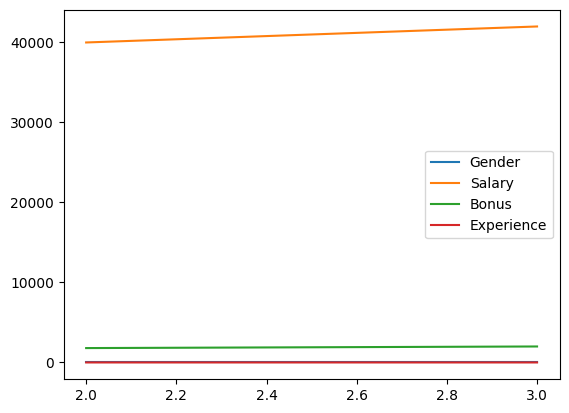

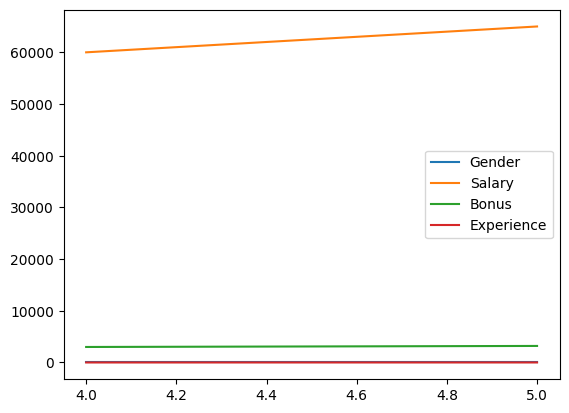

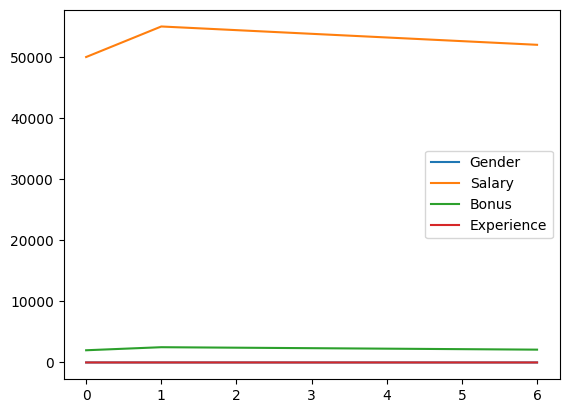

In [ ]:
%matplotlib inline
dept.plot()

### Descriptive Stats per Group

In [ ]:
df.groupby("Department").describe()

Gender                                             Salary  \
            count      mean      std  min  25%  50%  75%  max  count   
Department                                                             
HR            2.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0    2.0   
IT            2.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0    2.0   
Sales         3.0  0.666667  0.57735  0.0  0.5  1.0  1.0  1.0    3.0   

                          ...   Bonus         Experience                      \
                    mean  ...     75%     max      count mean       std  min   
Department                ...                                                  
HR          41000.000000  ...  1950.0  2000.0        2.0  4.5  0.707107  4.0   
IT          62500.000000  ...  3150.0  3200.0        2.0  4.5  2.121320  3.0   
Sales       52333.333333  ...  2300.0  2500.0        3.0  2.0  1.000000  1.0   

                                  
             25%  50%   75%  max  
Department                        
HR          4.25  4.5  4.75  5.0  
IT          3.75  4.5  5.25  6.0  
Sales       1.50  2.0  2.50  3.0  

[3 rows x 32 columns]

In [ ]:
df.groupby("Department")["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
HR,2.0,41000.000000,1414.213562,40000.0,40500.0,41000.0,41500.0,42000.0
IT,2.0,62500.000000,3535.533906,60000.0,61250.0,62500.0,63750.0,65000.0
Sales,3.0,52333.333333,2516.611478,50000.0,51000.0,52000.0,53500.0,55000.0


## ----------- Basic Aggregations (np) -----------
> mean, median, prod, sum, std, var

In [42]:
dept.max()

,Employee,Gender,Salary,Bonus,Experience
Department,,,,,
HR,D,0,42000,2000,5
IT,F,1,65000,3200,6
Sales,G,1,55000,2500,3


#### Resetting Index After GroupBy

In [51]:
dept.max().reset_index()

,Department,Employee,Gender,Salary,Bonus,Experience
0,HR,D,0,42000,2000,5
1,IT,F,1,65000,3200,6
2,Sales,G,1,55000,2500,3


In [38]:
# ❌❌ TypeError: agg function failed [how->mean,dtype->object] ❌❌
# dept.mean()

In [36]:
# Group by Department and calculate mean
df.groupby("Department")["Salary"].mean()

Department
HR       41000.000000
IT       62500.000000
Sales    52333.333333
Name: Salary, dtype: float64

#### Resetting Index After GroupBy

In [52]:
df.groupby("Department")["Salary"].mean().reset_index()

,Department,Salary
0,HR,41000.000000
1,IT,62500.000000
2,Sales,52333.333333


In [18]:
df.groupby("Department", group_keys=False)["Salary"].mean()

Department
HR       41000.000000
IT       62500.000000
Sales    52333.333333
Name: Salary, dtype: float64

In [14]:
df.groupby(["Department", "Gender"])["Bonus"].max()

Department  Gender
HR          0         2000
IT          1         3200
Sales       0         2500
            1         2100
Name: Bonus, dtype: int64

### Sorting Groups

In [ ]:
df.groupby("Department")["Salary"].mean().sort_values(ascending=False)

Department
IT       62500.000000
Sales    52333.333333
HR       41000.000000
Name: Salary, dtype: float64

### Filter Groups

In [ ]:
# Keep only departments where avg salary > 50k
df.groupby("Department").filter(lambda x: x["Salary"].mean() > 50000)

,Department,Employee,Gender,Salary,Bonus,Experience
0,Sales,A,1,50000,2000,2
1,Sales,B,0,55000,2500,3
4,IT,E,1,60000,3000,3
5,IT,F,1,65000,3200,6
6,Sales,G,1,52000,2100,1


## ----------- AGG -----------
> Aggregate using one or more operations over the specified axis

> Returns a reduced result (summary/statistics)

> ---> Shrinks the rows

> DataFrame.agg(func=None, axis=0, *args, **kwargs)

In [95]:
data = {
    "Department": ["Sales", "Sales", "HR", "HR", "IT", "IT", "Sales"],
    "Employee": ["A", "B", "C", "D", "E", "F", "G"],
    "Gender": [1, 0, 0, 0, 1, 1, 1],
    "Salary": [50000, 55000, 40000, 42000, 60000, 65000, 52000],
    "Bonus": [2000, 2500, 1800, 2000, 3000, 3200, 2100],
    "Experience": [2, 3, 4, 5, 3, 6, 1]
}

df = pd.DataFrame(data)
df


,Department,Employee,Gender,Salary,Bonus,Experience
0,Sales,A,1,50000,2000,2
1,Sales,B,0,55000,2500,3
2,HR,C,0,40000,1800,4
3,HR,D,0,42000,2000,5
4,IT,E,1,60000,3000,3
5,IT,F,1,65000,3200,6
6,Sales,G,1,52000,2100,1


In [96]:
df.agg('sum')

Department    SalesSalesHRHRITITSales
Employee                      ABCDEFG
Gender                              4
Salary                         364000
Bonus                           16600
Experience                         24
dtype: object

#### Named Aggregations

In [97]:
df.groupby("Department").agg(
    avg_salary = ("Salary", "mean"),
    total_bonus = ("Bonus", "sum"),
    max_exp = ("Experience", "max")
)


,avg_salary,total_bonus,max_exp
Department,,,
HR,41000.000000,3800,5
IT,62500.000000,6200,6
Sales,52333.333333,6600,3


In [65]:
df = pd.DataFrame([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9],
                       [np.nan, np.nan, np.nan]],
                    columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [66]:
df.agg(['sum', 'max', 'min'])

,A,B,C
sum,12.0,15.0,18.0
max,7.0,8.0,9.0
min,1.0,2.0,3.0


In [68]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [69]:
df.agg("mean", axis="columns")

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

In [71]:
df.agg("max", axis=1)

0    3.0
1    6.0
2    9.0
3    NaN
dtype: float64

In [72]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean'))

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,6.0


## ----------- Transform -----------
> Returns an output with the same shape as the original group (so you can assign it back as a new column)

> --> apply group logic but keep row alignment

> ---> Preserves rows

> DataFrame.transform(func, axis=0, *args, **kwargs)

In [88]:
data = {
    "Department": ["HR", "HR", "IT", "IT", "Finance", "Finance"],
    "Salary": [3000, 3500, 5000, 6000, 4500, 4800]
}
df = pd.DataFrame(data)

In [84]:
print(df.groupby("Department")["Salary"].mean())
df["Salary_mean_dept"] = df.groupby("Department")["Salary"].mean()
df

Department
Finance    4650.0
HR         3250.0
IT         5500.0
Name: Salary, dtype: float64


,Department,Salary,Salary_mean_dept
0,HR,3000,NaN
1,HR,3500,NaN
2,IT,5000,NaN
3,IT,6000,NaN
4,Finance,4500,NaN
5,Finance,4800,NaN


In [91]:
print(df.groupby("Department")["Salary"].agg("mean"))

Department
Finance    4650.0
HR         3250.0
IT         5500.0
Name: Salary, dtype: float64


In [89]:
df["Salary_mean_dept"] = df.groupby("Department")["Salary"].transform("mean")
df

,Department,Salary,Salary_mean_dept
0,HR,3000,3250.0
1,HR,3500,3250.0
2,IT,5000,5500.0
3,IT,6000,5500.0
4,Finance,4500,4650.0
5,Finance,4800,4650.0


In [90]:
# Normalization within each department
df["Salary_z_score_normalized"] = df.groupby("Department")["Salary"].transform(
    lambda x: (x - x.mean()) / x.std()
)
df

,Department,Salary,Salary_mean_dept,Salary_z_score_normalized
0,HR,3000,3250.0,-0.707107
1,HR,3500,3250.0,0.707107
2,IT,5000,5500.0,-0.707107
3,IT,6000,5500.0,0.707107
4,Finance,4500,4650.0,-0.707107
5,Finance,4800,4650.0,0.707107


In [104]:
df = pd.DataFrame({
    "c": [1, 1, 1, 2, 2, 2, 2],
    "type": ["m", "n", "o", "m", "m", "n", "n"]
})
df

,c,type
0,1,m
1,1,n
2,1,o
3,2,m
4,2,m
5,2,n
6,2,n


In [100]:
df['size'] = df.groupby('c')['type'].transform(len)
df

,c,type,size
0,1,m,3
1,1,n,3
2,1,o,3
3,2,m,4
4,2,m,4
5,2,n,4
6,2,n,4


In [101]:
df['size'] = df.groupby('c')['type'].transform("max")
df

,c,type,size
0,1,m,o
1,1,n,o
2,1,o,o
3,2,m,n
4,2,m,n
5,2,n,n
6,2,n,n


In [111]:
df['size'] = df.groupby('type')['c'].transform("max")
df

,c,type,size
0,1,m,2
1,1,n,2
2,1,o,1
3,2,m,2
4,2,m,2
5,2,n,2
6,2,n,2


In [115]:
g = df.groupby('type')
for i, v in g:
    print(i, "\n")
    print(v, "\n\n")

m 

   c type      size
0  1    m  1.666667
3  2    m  1.666667
4  2    m  1.666667 


n 

   c type      size
1  1    n  1.666667
5  2    n  1.666667
6  2    n  1.666667 


o 

   c type  size
2  1    o   1.0 




In [114]:
df['size'] = df.groupby('type')['c'].transform("mean")
df

,c,type,size
0,1,m,1.666667
1,1,n,1.666667
2,1,o,1.000000
3,2,m,1.666667
4,2,m,1.666667
5,2,n,1.666667
6,2,n,1.666667


In [105]:
g = df.groupby('c')

for dpt, gp in g:
    print(dpt)
    print("-------------------------")
    print(gp)
    print("\n-------------------------")

1
-------------------------
   c type
0  1    m
1  1    n
2  1    o

-------------------------
2
-------------------------
   c type
3  2    m
4  2    m
5  2    n
6  2    n

-------------------------


In [106]:
df['size'] = df.groupby(['c', 'type'])['type'].transform(len)
df

,c,type,size
0,1,m,1
1,1,n,1
2,1,o,1
3,2,m,2
4,2,m,2
5,2,n,2
6,2,n,2
